Feature engineering refers to using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.

Using Feature Engineering try the algorithms you discovered and apply them to the previous Data Sets

In [88]:
# import the libraries 
import numpy as np
import pandas as pd

# import libraries for plot creating
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# import the dataset
df = pd.read_csv("pokemon.csv")

In [90]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [92]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### check the correlation

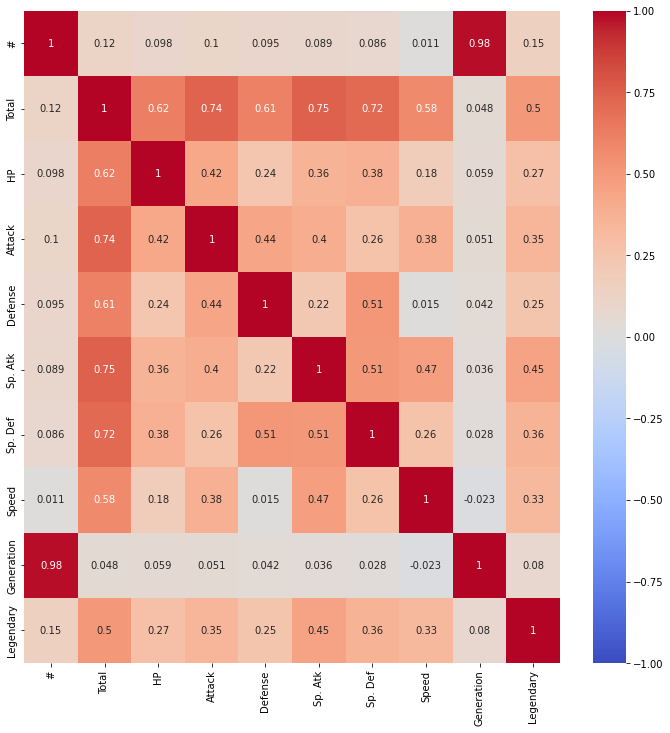

In [94]:
plt.figure(figsize = (12, 12))

sns.heatmap(df[["#","Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),
            vmin = -1,
            cmap = 'coolwarm',
            annot = True);

In [95]:
df = df[['Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

### transform data from X to int

In [96]:
# map = gender(0, 1) - male = 1, female = 0
def data_to_number(x):
    if x == "True":
        return 1
    else:
        return 0

df['Legendary'] = df["Legendary"].map(data_to_number)

In [97]:
df.head(5)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   Legendary   800 non-null    int64
dtypes: int64(9)
memory usage: 56.4 KB


### check for missing values

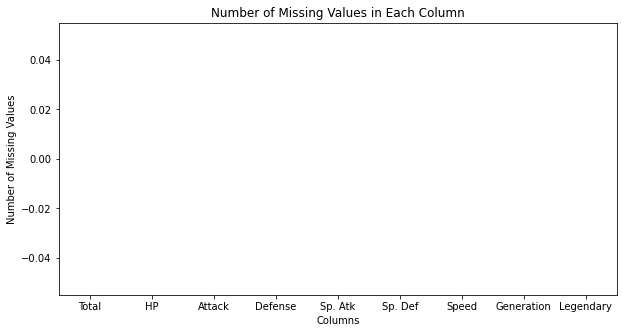

In [99]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

### chech for outliers

C:\Python310\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


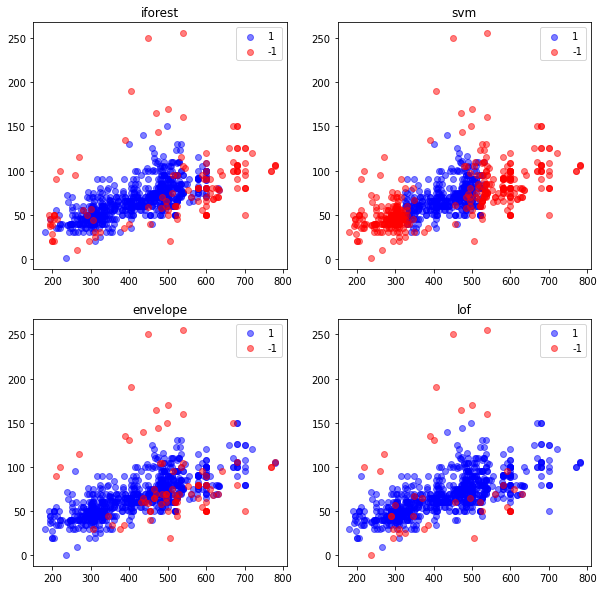

In [100]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

isf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
svm = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
ee = EllipticEnvelope(contamination=0.01)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define the colors for normal samples and outliers
colors = {1: 'b', -1: 'r'}

# Define the models for loop
models = {'iforest': IsolationForest(), 'svm': OneClassSVM(), 'envelope': EllipticEnvelope(), 'lof':LocalOutlierFactor()}
# models = {'iforest': isf, 'svm': svm, 'envelope': ee, 'lof': lof}

# Loop through the algorithms and plot the data on the subplots
for i, (name, model) in enumerate(models.items()):
    # Fit the model and predict the outliers
    model.fit(df)
    y_pred = model.fit_predict(df)

    # Get the subplot to plot on
    ax = axs[i//2][i%2]

    # Loop through the classes (normal and outlier)
    for label, color in colors.items():
        # Get the indices of the samples for the current class
        indices = (y_pred == label)

        # Plot the samples for the current class with the appropriate color
        ax.scatter(df.iloc[indices, 0], df.iloc[indices, 1], c=color, label=label, alpha=0.5)

    # Set the title and legend for the subplot
    ax.set_title(name)
    ax.legend()

# Show the plot
plt.show()

In [101]:
# Load your dataset into variable `X`
X = df
# Isolation Forest
isf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
isf.fit(X)
isf_preds = isf.predict(X)

# One Class SVM
svm = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
svm.fit(X)
svm_preds = svm.predict(X)

# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.01)
ee.fit(X)
ee_preds = ee.predict(X)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_preds = lof.fit_predict(X)

# Print the outlier predictions for each model
print("Isolation Forest:")
print(isf_preds.sum())
print("One Class SVM:")
print(svm_preds.sum())
print("Elliptic Envelope:")
print(ee_preds.sum())
print("Local Outlier Factor:")
print(lof_preds.sum())


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Isolation Forest:
784
One Class SVM:
56
Elliptic Envelope:
784
Local Outlier Factor:
784


### Remove the oultiers

In [102]:
# interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Total         185.00
HP             30.00
Attack         45.00
Defense        40.00
Sp. Atk        45.25
Sp. Def        40.00
Speed          45.00
Generation      3.00
Legendary       0.00
dtype: float64


In [103]:
# remove the outliers from dataframe 
new_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df.shape

(748, 9)

In [117]:
new_df.head(5)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


In [120]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       748 non-null    int64
 1   HP          748 non-null    int64
 2   Attack      748 non-null    int64
 3   Defense     748 non-null    int64
 4   Sp. Atk     748 non-null    int64
 5   Sp. Def     748 non-null    int64
 6   Speed       748 non-null    int64
 7   Generation  748 non-null    int64
 8   Legendary   748 non-null    int64
dtypes: int64(9)
memory usage: 58.4 KB


### Feature Scaling

In [74]:
# scale 'Total' column to range of 0 to 1
df['Total'] = df['Total'] / df['Total'].max()

# feature scaling for numerical columns
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
feature_df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

# print first 5 rows of the transformed data
print(feature_df.head())


      Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
0  0.407692 -0.950032 -0.924328 -0.796655 -0.238981 -0.248033 -0.801002   
1  0.519231 -0.362595 -0.523803 -0.347700  0.219422  0.290974 -0.284837   
2  0.673077  0.420654  0.092390  0.293665  0.830626  1.009651  0.403383   
3  0.801282  0.420654  0.646964  1.576395  1.502951  1.728328  0.403383   
4  0.396154 -1.185007 -0.831899 -0.989065 -0.391782 -0.787041 -0.112782   

   Generation  Legendary  
0           1          0  
1           1          0  
2           1          0  
3           1          0  
4           1          0  


### Feature Normalization (MinMaxSlaer)

In [75]:
# librari for normalization between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# select the numerical columns for normalization
numeric_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numeric_data = df[numeric_cols]

# apply min-max normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

# create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# merge the scaled dataframe with the original dataframe
pokemon_df = pd.concat([df.drop(numeric_cols, axis=1), scaled_df], axis=1)

# print first 5 rows of the transformed data
print(pokemon_df.head())


   Generation  Legendary     Total        HP    Attack   Defense   Sp. Atk  \
0           1          0  0.230000  0.173228  0.237838  0.195556  0.298913   
1           1          0  0.375000  0.232283  0.308108  0.257778  0.380435   
2           1          0  0.575000  0.311024  0.416216  0.346667  0.489130   
3           1          0  0.741667  0.311024  0.513514  0.524444  0.608696   
4           1          0  0.215000  0.149606  0.254054  0.168889  0.271739   

    Sp. Def     Speed  
0  0.214286  0.228571  
1  0.285714  0.314286  
2  0.380952  0.428571  
3  0.476190  0.428571  
4  0.142857  0.342857  


### Feature Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

# load data
pokemon_df = pd.read_csv('pokemon.csv')

# select the numerical columns for standardization
numeric_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numeric_data = pokemon_df[numeric_cols]

# apply standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# merge the scaled dataframe with the original dataframe
pokemon_df = pd.concat([pokemon_df.drop(numeric_cols, axis=1), scaled_df], axis=1)

# print first 5 rows of the transformed data
print(pokemon_df.head())

   #                   Name Type 1  Type 2  Generation  Legendary     Total  \
0  1              Bulbasaur  Grass  Poison           1      False -0.976765   
1  2                Ivysaur  Grass  Poison           1      False -0.251088   
2  3               Venusaur  Grass  Poison           1      False  0.749845   
3  3  VenusaurMega Venusaur  Grass  Poison           1      False  1.583957   
4  4             Charmander   Fire     NaN           1      False -1.051836   

         HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  
0 -0.950626 -0.924906 -0.797154 -0.239130 -0.248189 -0.801503  
1 -0.362822 -0.524130 -0.347917  0.219560  0.291156 -0.285015  
2  0.420917  0.092448  0.293849  0.831146  1.010283  0.403635  
3  0.420917  0.647369  1.577381  1.503891  1.729409  0.403635  
4 -1.185748 -0.832419 -0.989683 -0.392027 -0.787533 -0.112853  


### DummyVariable

In [86]:
# select the categorical columns for creating dummy variables
cat_cols = ['Generation', 'Legendary']
cat_data = df[cat_cols]

# create dummy variables for the categorical data
dummy_df = pd.get_dummies(cat_data)

# merge the dummy dataframe with the original dataframe
dum_poke_df = pd.concat([df.drop(cat_cols, axis=1), dummy_df], axis=1)

# print first 5 rows of the transformed data
print(dum_poke_df.head())


      Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
0  0.407692 -0.950032 -0.924328 -0.796655 -0.238981 -0.248033 -0.801002   
1  0.519231 -0.362595 -0.523803 -0.347700  0.219422  0.290974 -0.284837   
2  0.673077  0.420654  0.092390  0.293665  0.830626  1.009651  0.403383   
3  0.801282  0.420654  0.646964  1.576395  1.502951  1.728328  0.403383   
4  0.396154 -1.185007 -0.831899 -0.989065 -0.391782 -0.787041 -0.112782   

   Generation  Legendary  
0           1          0  
1           1          0  
2           1          0  
3           1          0  
4           1          0  


### Box-Cox Transformer

In [107]:
!pip install imperio

  Using cached imperio-0.1.5-py3-none-any.whl (24 kB)


In [151]:
new_df.head(5)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


In [152]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       748 non-null    int64
 1   HP          748 non-null    int64
 2   Attack      748 non-null    int64
 3   Defense     748 non-null    int64
 4   Sp. Atk     748 non-null    int64
 5   Sp. Def     748 non-null    int64
 6   Speed       748 non-null    int64
 7   Generation  748 non-null    int64
 8   Legendary   748 non-null    int64
dtypes: int64(9)
memory usage: 58.4 KB


In [149]:
from sklearn.pipeline import Pipeline
from imperio import BoxCoxTransformer
from sklearn.linear_model import LogisticRegression 

pipe = Pipeline([
    ('boxcox', BoxCoxTransformer()), 
     ('model', LogisticRegression())
     ]) 
new_box_df = boxcox.apply(df, target = ('Legendary'), columns = ['Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation'])

In [150]:
new_box_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,33,11,12,12,14,14,11,0,0
1,38,13,13,13,15,15,13,0,0
2,43,15,16,16,18,18,15,0,0
3,48,15,18,20,20,19,15,0,0
4,33,10,12,11,13,12,14,0,0
...,...,...,...,...,...,...,...,...,...
795,46,12,18,22,18,22,12,2,0
796,50,12,23,18,23,18,18,2,0
797,46,15,18,13,22,20,14,2,0
798,50,15,23,13,24,20,15,2,0


In [121]:
# creat an subseet from all data sets
X = new_df[['Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

# select the target column
y = new_df['Legendary']

In [131]:
# splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [135]:
new_df.head(1)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0


In [19]:
# try imperio - implementation
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

# load data
pokemon_df = pd.read_csv('pokemon.csv')

# select the numerical columns for Box-Cox transformation
numeric_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numeric_data = pokemon_df[numeric_cols]

# define the Box-Cox transformer for the numerical data
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# apply Box-Cox transformation to the numerical data
transformed_data = boxcox_transformer.fit_transform(numeric_data)

# create a new dataframe with the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=numeric_cols)

# merge the transformed dataframe with the original dataframe
pokemon_box_df = pd.concat([pokemon_df.drop(numeric_cols, axis=1), transformed_df], axis=1)

# print first 5 rows of the transformed data
print(pokemon_box_df.head())


   #                   Name Type 1  Type 2  Generation  Legendary       Total  \
0  1              Bulbasaur  Grass  Poison           1      False   69.756906   
1  2                Ivysaur  Grass  Poison           1      False   82.313076   
2  3               Venusaur  Grass  Poison           1      False   98.258473   
3  3  VenusaurMega Venusaur  Grass  Poison           1      False  110.641973   
4  4             Charmander   Fire     NaN           1      False   68.397121   

          HP     Attack    Defense    Sp. Atk    Sp. Def      Speed  
0   8.943886  14.049631   8.300129   9.043637   8.300086  15.630829  
1  10.337151  16.285033   9.326152   9.905108   9.045306  19.019259  
2  11.899968  19.354830  10.560612  10.899678   9.899403  23.073918  
3  11.899968  21.845370  12.541397  11.850347  10.640764  23.073918  
4   8.308200  14.586578   7.801458   8.727113   7.422196  20.075329  


### ZCA Transformation

In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import randomized_svd
from sklearn.preprocessing import StandardScaler


X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

X_zca = np.dot(pca.transform(X_scaled), pca.components_)

df_zca = pd.DataFrame(X_zca, columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])



def zca_whitening(X):
    X = StandardScaler().fit_transform(X)
    U, S, V = randomized_svd(X.T.dot(X), n_components=X.shape[1])
    X_zca = U.dot(np.diag(1.0/np.sqrt(S + 1e-5))).dot(U.T).dot(X.T).T
    return X_zca

X_zca = zca_whitening(X)
df_zca = pd.DataFrame(X_zca, columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

print(df_zca)


           HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
0   -0.029829 -0.019073 -0.026393  0.006034  0.006116 -0.027758
1   -0.013554 -0.014840 -0.014612  0.013035  0.016906 -0.012568
2    0.007537 -0.005993  0.002103  0.021996  0.031038  0.007265
3   -0.003109  0.004288  0.043908  0.042960  0.043668  0.001202
4   -0.035668 -0.017433 -0.025999 -0.000843 -0.015545  0.001869
..        ...       ...       ...       ...       ...       ...
795 -0.054789  0.018700  0.062876  0.016257  0.099482 -0.036476
796 -0.065976  0.085042  0.016014  0.084954  0.030303  0.018230
797 -0.011768  0.038802 -0.053121  0.077777  0.078711 -0.033438
798 -0.025479  0.101685 -0.067258  0.094672  0.076578 -0.036060
799 -0.000407  0.016976  0.048032  0.065387 -0.004565 -0.013871

[800 rows x 6 columns]


C:\Python310\lib\site-packages\sklearn\utils\extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


### Advanced Imperio Methods: Categorical features.


### Frequency Imputation

In [162]:
new_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...
794,600,108,100,121,81,95,95,6,0
795,600,50,100,150,100,150,50,6,0
796,700,50,160,110,160,110,110,6,0
797,600,80,110,60,150,130,70,6,0


In [166]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 

pipe = Pipeline([
     ( 'freq', FrequencyImputationTransformer(index=[10, 11, 12]), 
    ( 'model', LogisticRegression()))
])
 
new_freq_df = freq.apply(new_df, target = ('Legendary'), columns = ['Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation'])

In [167]:
new_freq_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Target Imputation

Target imputation is a technique where missing values in a column are imputed using the values from another column that is highly correlated with the missing column. In order to implement this, you would need to identify which columns are highly correlated, and then use the non-missing values in the highly correlated column to impute the missing values in the target column.

In [67]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("pokemon.csv")

# Split the data into training and test sets
X = data.drop("HP", axis=1)
y = data["HP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the training set
imputer = SimpleImputer(strategy="most_frequent")
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Impute missing values in the test set using most frequent value from the training set
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Check if there are any missing values left
print(X_train_imputed.isnull().sum())
print(X_test_imputed.isnull().sum())


#             0
Name          0
Type 1        0
Type 2        0
Total         0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64
#             0
Name          0
Type 1        0
Type 2        0
Total         0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64
